# The Lorenz Strange Attractor

## Theoretical Background

The **Lorenz system** is a set of three coupled, first-order, nonlinear ordinary differential equations originally derived by Edward Lorenz in 1963 as a simplified model for atmospheric convection. This system became one of the foundational examples of **deterministic chaos** and is characterized by its sensitive dependence on initial conditions—the hallmark of chaotic systems.

### The Lorenz Equations

The system is defined by:

$$\frac{dx}{dt} = \sigma(y - x)$$

$$\frac{dy}{dt} = x(\rho - z) - y$$

$$\frac{dz}{dt} = xy - \beta z$$

where:
- $x$, $y$, $z$ are the state variables
- $\sigma$ (sigma) is the **Prandtl number** — ratio of kinematic viscosity to thermal diffusivity
- $\rho$ (rho) is the **Rayleigh number** — measure of thermal driving force
- $\beta$ (beta) is a geometric factor related to the aspect ratio of convection rolls

### Classical Parameter Values

Lorenz used the following parameter values to demonstrate chaotic behavior:

$$\sigma = 10, \quad \rho = 28, \quad \beta = \frac{8}{3}$$

### Strange Attractor Properties

The Lorenz attractor exhibits several remarkable properties:

1. **Non-periodic trajectories**: Solutions never repeat exactly, yet remain bounded
2. **Fractal dimension**: The attractor has a fractal (non-integer) dimension $\approx 2.06$
3. **Sensitive dependence on initial conditions**: Nearby trajectories diverge exponentially (positive Lyapunov exponent)
4. **Dissipative system**: The system contracts phase space volume at rate $-(\sigma + 1 + \beta)$

### Fixed Points

The system has three equilibrium points:

1. **Origin**: $(0, 0, 0)$ — unstable for $\rho > 1$
2. **Symmetric pair**: $C^{\pm} = (\pm\sqrt{\beta(\rho-1)}, \pm\sqrt{\beta(\rho-1)}, \rho-1)$

For $\rho = 28$, these become $C^{\pm} \approx (\pm 8.485, \pm 8.485, 27)$.

The trajectory spirals around one fixed point, then switches unpredictably to the other, creating the characteristic "butterfly" or "owl mask" shape.

## Numerical Implementation

We will solve the Lorenz system using the **Runge-Kutta 4th order method** (RK4), which provides a good balance between accuracy and computational efficiency for this type of ODE system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
def lorenz_system(t, state, sigma, rho, beta):
    """
    Compute the derivatives of the Lorenz system.
    
    Parameters:
    -----------
    t : float
        Time (not explicitly used, but required by solve_ivp)
    state : array-like
        Current state [x, y, z]
    sigma, rho, beta : float
        Lorenz system parameters
        
    Returns:
    --------
    derivatives : list
        [dx/dt, dy/dt, dz/dt]
    """
    x, y, z = state
    
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    return [dx_dt, dy_dt, dz_dt]

## Solving the System

We integrate the Lorenz equations using `scipy.integrate.solve_ivp` with the RK45 method (adaptive Runge-Kutta).

In [3]:
# Classical Lorenz parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Initial conditions (slightly off the origin)
x0, y0, z0 = 1.0, 1.0, 1.0
initial_state = [x0, y0, z0]

# Time span for integration
t_start = 0.0
t_end = 50.0
t_span = (t_start, t_end)

# Number of evaluation points
n_points = 10000
t_eval = np.linspace(t_start, t_end, n_points)

# Solve the ODE system
solution = solve_ivp(
    lorenz_system,
    t_span,
    initial_state,
    args=(sigma, rho, beta),
    method='RK45',
    t_eval=t_eval,
    dense_output=True
)

# Extract solution
t = solution.t
x, y, z = solution.y

print(f"Integration successful: {solution.success}")
print(f"Number of time steps: {len(t)}")
print(f"Time range: [{t[0]:.2f}, {t[-1]:.2f}]")

Integration successful: True
Number of time steps: 10000
Time range: [0.00, 50.00]


## Visualization of the Strange Attractor

We create a comprehensive visualization showing:
1. The 3D trajectory (the iconic butterfly shape)
2. 2D projections onto the principal planes
3. Time series of each variable

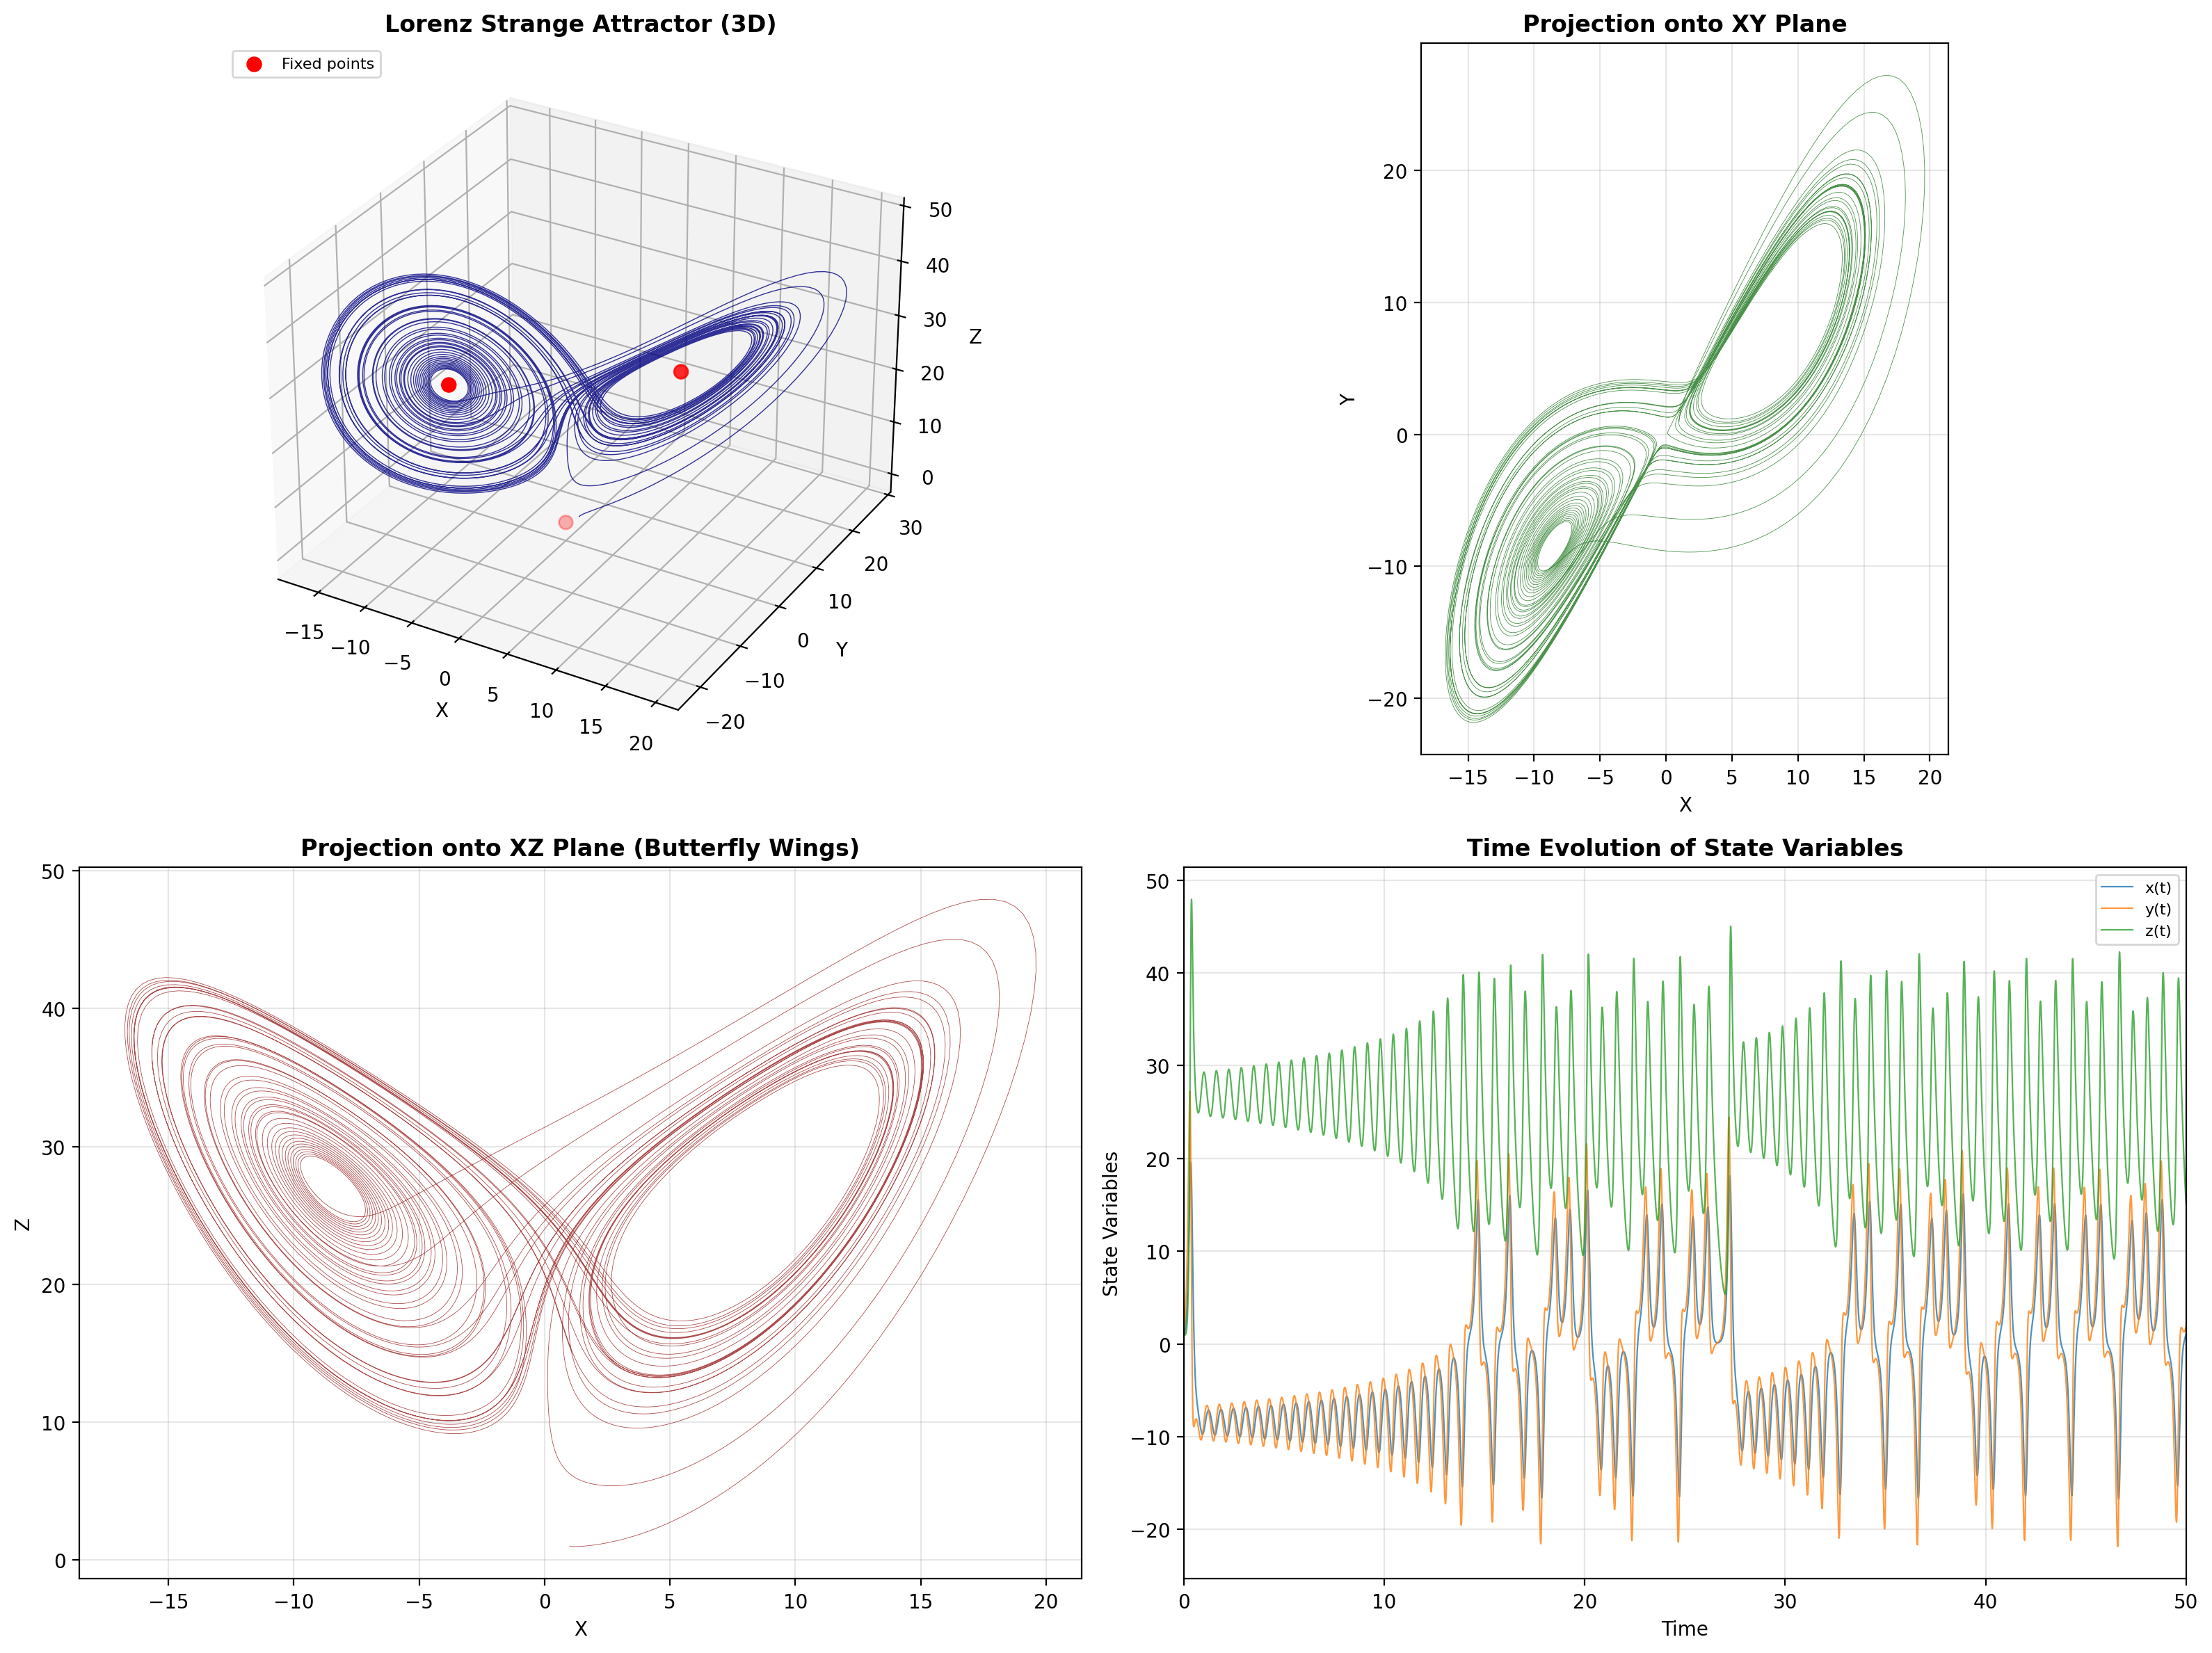


Plot saved to 'strange_attractor_lorenz_comprehensive_analysis.png'


In [4]:
# Create figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# 3D trajectory plot
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot(x, y, z, lw=0.5, color='navy', alpha=0.8)
ax1.set_xlabel('X', fontsize=10)
ax1.set_ylabel('Y', fontsize=10)
ax1.set_zlabel('Z', fontsize=10)
ax1.set_title('Lorenz Strange Attractor (3D)', fontsize=12, fontweight='bold')

# Mark the fixed points
c_plus = np.sqrt(beta * (rho - 1))
ax1.scatter([0, c_plus, -c_plus], [0, c_plus, -c_plus], [0, rho-1, rho-1], 
            color='red', s=50, marker='o', label='Fixed points')
ax1.legend(loc='upper left', fontsize=8)

# XY projection
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(x, y, lw=0.3, color='darkgreen', alpha=0.7)
ax2.set_xlabel('X', fontsize=10)
ax2.set_ylabel('Y', fontsize=10)
ax2.set_title('Projection onto XY Plane', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal', adjustable='box')

# XZ projection
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(x, z, lw=0.3, color='darkred', alpha=0.7)
ax3.set_xlabel('X', fontsize=10)
ax3.set_ylabel('Z', fontsize=10)
ax3.set_title('Projection onto XZ Plane (Butterfly Wings)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Time series
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(t, x, lw=0.8, label='x(t)', alpha=0.8)
ax4.plot(t, y, lw=0.8, label='y(t)', alpha=0.8)
ax4.plot(t, z, lw=0.8, label='z(t)', alpha=0.8)
ax4.set_xlabel('Time', fontsize=10)
ax4.set_ylabel('State Variables', fontsize=10)
ax4.set_title('Time Evolution of State Variables', fontsize=12, fontweight='bold')
ax4.legend(loc='upper right', fontsize=8)
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0, 50)

plt.tight_layout()
plt.savefig('strange_attractor_lorenz_comprehensive_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nPlot saved to 'strange_attractor_lorenz_comprehensive_analysis.png'")

## Demonstrating Sensitive Dependence on Initial Conditions

The hallmark of chaos is that infinitesimally close initial conditions lead to vastly different trajectories. Let's demonstrate this by comparing two trajectories with nearly identical starting points.

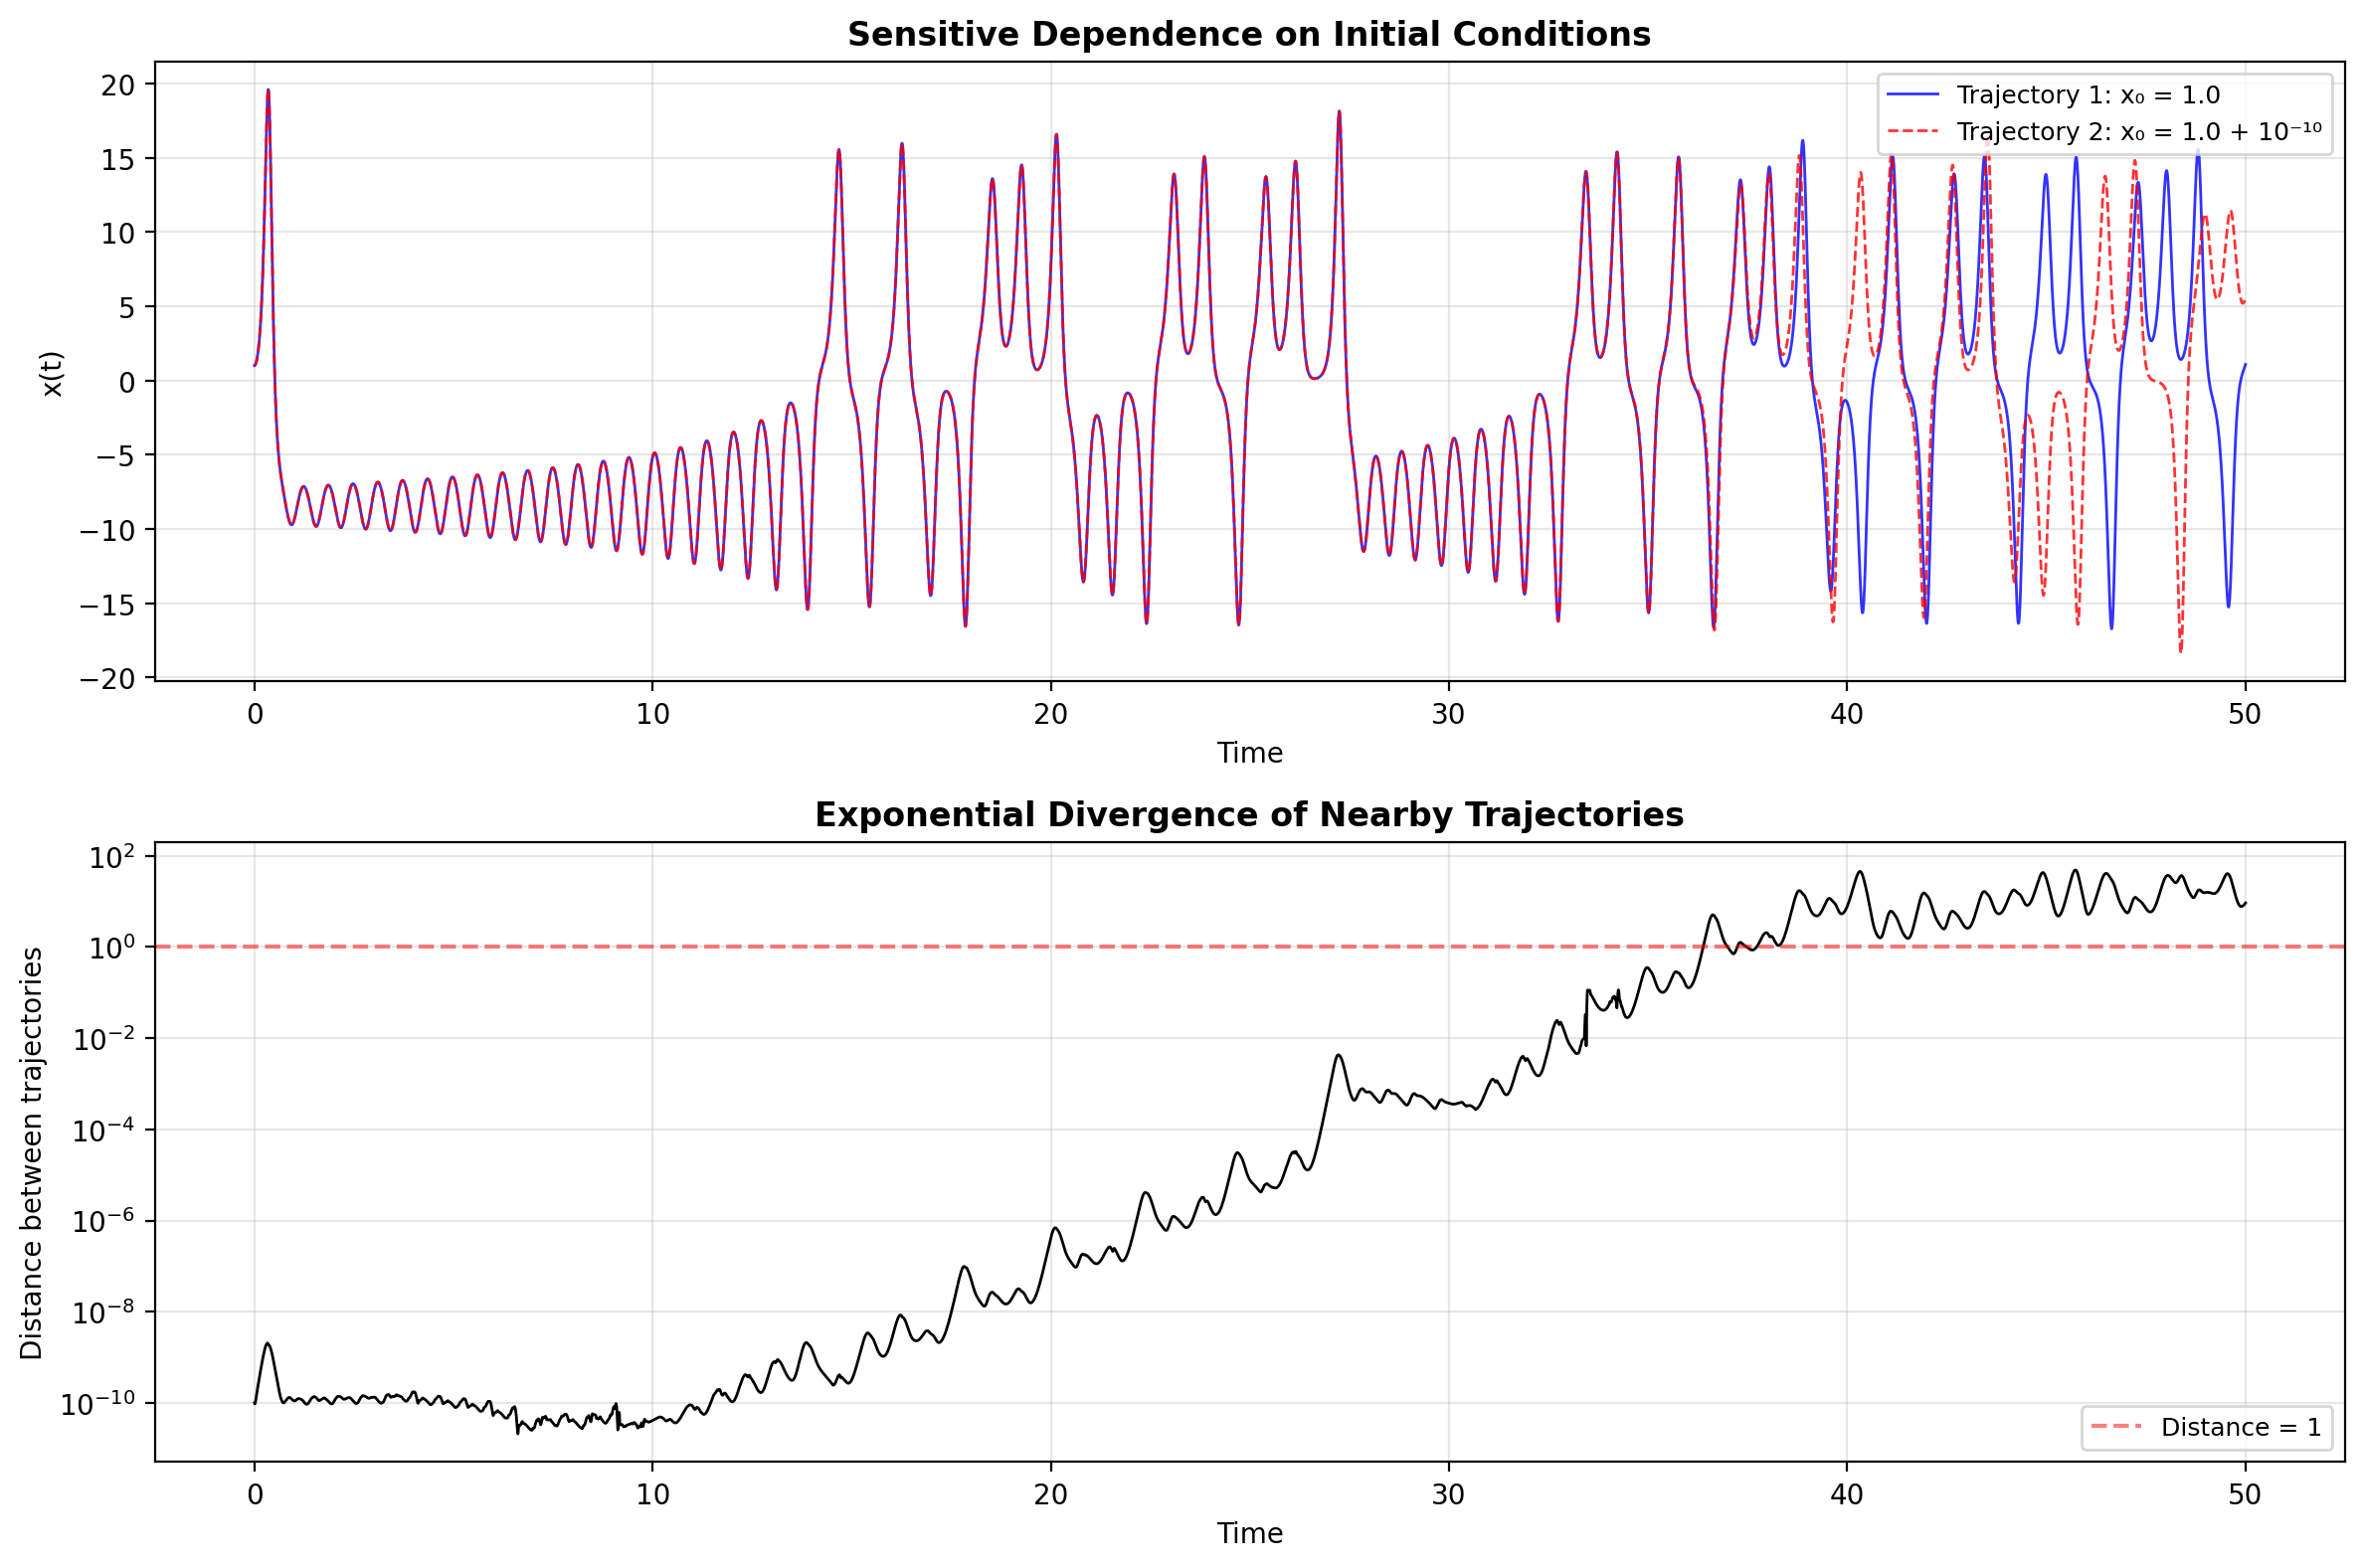


Trajectories diverge beyond distance 1 at t ≈ 36.38
Initial separation: 1.00e-10
Amplification factor: 1.03e+10


In [5]:
# Two very close initial conditions
ic1 = [1.0, 1.0, 1.0]
ic2 = [1.0 + 1e-10, 1.0, 1.0]  # Differs by 10^-10 in x

# Solve both systems
sol1 = solve_ivp(lorenz_system, t_span, ic1, args=(sigma, rho, beta), 
                 method='RK45', t_eval=t_eval)
sol2 = solve_ivp(lorenz_system, t_span, ic2, args=(sigma, rho, beta), 
                 method='RK45', t_eval=t_eval)

# Calculate divergence
divergence = np.sqrt((sol1.y[0] - sol2.y[0])**2 + 
                     (sol1.y[1] - sol2.y[1])**2 + 
                     (sol1.y[2] - sol2.y[2])**2)

# Plot the divergence
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Time series comparison
axes[0].plot(t, sol1.y[0], 'b-', lw=1, label='Trajectory 1: x₀ = 1.0', alpha=0.8)
axes[0].plot(t, sol2.y[0], 'r--', lw=1, label='Trajectory 2: x₀ = 1.0 + 10⁻¹⁰', alpha=0.8)
axes[0].set_xlabel('Time', fontsize=10)
axes[0].set_ylabel('x(t)', fontsize=10)
axes[0].set_title('Sensitive Dependence on Initial Conditions', fontsize=12, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=9)
axes[0].grid(True, alpha=0.3)

# Divergence (log scale)
axes[1].semilogy(t, divergence, 'k-', lw=1)
axes[1].set_xlabel('Time', fontsize=10)
axes[1].set_ylabel('Distance between trajectories', fontsize=10)
axes[1].set_title('Exponential Divergence of Nearby Trajectories', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Distance = 1')
axes[1].legend(loc='lower right', fontsize=9)

plt.tight_layout()
plt.show()

# Find when divergence exceeds 1
crossover_idx = np.where(divergence > 1)[0]
if len(crossover_idx) > 0:
    crossover_time = t[crossover_idx[0]]
    print(f"\nTrajectories diverge beyond distance 1 at t ≈ {crossover_time:.2f}")
    print(f"Initial separation: {np.abs(ic1[0] - ic2[0]):.2e}")
    print(f"Amplification factor: {divergence[crossover_idx[0]] / np.abs(ic1[0] - ic2[0]):.2e}")

## Analysis of the Attractor

Let's compute some quantitative properties of the attractor.

In [6]:
# Basic statistics of the attractor
print("=" * 50)
print("LORENZ ATTRACTOR STATISTICS")
print("=" * 50)
print(f"\nParameter values: σ = {sigma}, ρ = {rho}, β = {beta:.4f}")
print(f"\nState variable ranges:")
print(f"  x: [{x.min():.3f}, {x.max():.3f}]")
print(f"  y: [{y.min():.3f}, {y.max():.3f}]")
print(f"  z: [{z.min():.3f}, {z.max():.3f}]")

print(f"\nState variable means:")
print(f"  <x> = {x.mean():.3f}")
print(f"  <y> = {y.mean():.3f}")
print(f"  <z> = {z.mean():.3f}")

print(f"\nState variable standard deviations:")
print(f"  σ_x = {x.std():.3f}")
print(f"  σ_y = {y.std():.3f}")
print(f"  σ_z = {z.std():.3f}")

# Fixed points
c = np.sqrt(beta * (rho - 1))
print(f"\nFixed points:")
print(f"  Origin: (0, 0, 0)")
print(f"  C⁺: ({c:.3f}, {c:.3f}, {rho-1:.3f})")
print(f"  C⁻: ({-c:.3f}, {-c:.3f}, {rho-1:.3f})")

# Dissipation rate
dissipation = -(sigma + 1 + beta)
print(f"\nPhase space contraction rate: {dissipation:.4f}")
print(f"Volume contracts by factor e^({dissipation:.2f}t) per unit time")

LORENZ ATTRACTOR STATISTICS

Parameter values: σ = 10.0, ρ = 28.0, β = 2.6667

State variable ranges:
  x: [-16.735, 19.602]
  y: [-21.838, 27.235]
  z: [0.962, 47.936]

State variable means:
  <x> = -1.982
  <y> = -1.982
  <z> = 24.146

State variable standard deviations:
  σ_x = 7.797
  σ_y = 8.781
  σ_z = 8.097

Fixed points:
  Origin: (0, 0, 0)
  C⁺: (8.485, 8.485, 27.000)
  C⁻: (-8.485, -8.485, 27.000)

Phase space contraction rate: -13.6667
Volume contracts by factor e^(-13.67t) per unit time


## Conclusion

The Lorenz system demonstrates how simple deterministic equations can produce complex, unpredictable behavior. Key observations:

1. **Bounded but non-periodic**: The trajectory remains confined to the attractor but never exactly repeats

2. **Sensitive to initial conditions**: A perturbation of $10^{-10}$ grows to order unity in finite time

3. **Two-lobed structure**: The attractor consists of two "wings" corresponding to circulation around the two non-trivial fixed points $C^{\pm}$

4. **Practical implications**: This sensitivity to initial conditions fundamentally limits long-term weather prediction, which was Lorenz's original motivation

The Lorenz attractor remains a paradigmatic example of deterministic chaos and continues to inspire research in nonlinear dynamics, numerical methods, and complex systems theory.